# LAB SESSION 6


In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [2]:
# Calculate basic descriptive statistics
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std())
print("\nVariance:\n", df.var())

# Additional descriptive statistics
print("\nRange:\n", df.max() - df.min())
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())

Mean:
 age      -1.444295e-18
sex       2.543215e-18
bmi      -2.255925e-16
bp       -4.854086e-17
s1       -1.428596e-17
s2        3.898811e-17
s3       -6.028360e-18
s4       -1.788100e-17
s5        9.243486e-17
s6        1.351770e-17
target    1.521335e+02
dtype: float64

Median:
 age         0.005383
sex        -0.044642
bmi        -0.007284
bp         -0.005670
s1         -0.004321
s2         -0.003819
s3         -0.006584
s4         -0.002592
s5         -0.001947
s6         -0.001078
target    140.500000
dtype: float64

Mode:
 age        0.016281
sex       -0.044642
bmi       -0.030996
bp        -0.040099
s1        -0.037344
s2        -0.001001
s3        -0.013948
s4        -0.039493
s5        -0.018114
s6         0.003064
target    72.000000
Name: 0, dtype: float64

Standard Deviation:
 age        0.047619
sex        0.047619
bmi        0.047619
bp         0.047619
s1         0.047619
s2         0.047619
s3         0.047619
s4         0.047619
s5         0.047619
s6         0.04

In [3]:
from scipy import stats

# Example data: BMI values
bmi_values = df['bmi']

# Hypothetical population mean for BMI
population_mean = 0.05

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(bmi_values, population_mean)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -22.074985843710174
P-Value: 2.7634312235044638e-73


In [4]:
import numpy as np
from scipy import stats

# Sample mean and standard error for BMI
sample_mean = np.mean(bmi_values)
standard_error = stats.sem(bmi_values)

# Compute 95% confidence interval for BMI
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print(f"95% Confidence Interval for BMI: {confidence_interval}")

95% Confidence Interval for BMI: (-0.004439332370169141, 0.0044393323701686915)


In [5]:
import statsmodels.api as sm

# Define independent variable (add constant for intercept)
X = sm.add_constant(df['bmi'])

# Define dependent variable
y = df['target']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           3.47e-42
Time:                        19:50:57   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

# EXERCISE 5.1

# Step 1: Download the dataset
Dataset:
Kaggle URL:https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

Follow these steps to download the dataset:

Visit the link above.
Sign in to your Kaggle account (if you don’t have one, create it).
Click the Download button to get the dataset.
Once downloaded, extract the .csv file from the zipped folder.

# Step 2:Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

*pandas: For loading and handling the dataset.

*numpy: For basic mathematical operations.

*scipy.stats: For statistical analysis like hypothesis testing.

# Step 3: Load the data
Assume the dataset is named heart.csv.


In [24]:
# Load the dataset
df = pd.read_csv("Heart.csv")

# Display the first few rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


*pd.read_csv(): This function loads the CSV dataset into a pandas DataFrame.

*Replace "Heart.csv" with the actual path to your dataset.

# Step 4: Descriptive Statistics
Let's calculate the mean, median, mode, standard deviation, and variance for all numeric features.

In [27]:
# Summary statistics for resting blood pressure and cholesterol
mean_bp = df['trestbps'].mean()
median_bp = df['trestbps'].median()
mode_bp = df['trestbps'].mode()[0]
std_bp = df['trestbps'].std()
var_bp = df['trestbps'].var()

mean_chol = df['chol'].mean()
median_chol = df['chol'].median()
mode_chol = df['chol'].mode()[0]
std_chol = df['chol'].std()
var_chol = df['chol'].var()

print(f"Resting Blood Pressure: mean={mean_bp}, median={median_bp}, mode={mode_bp}, std={std_bp}, var={var_bp}")
print(f"Cholesterol: mean={mean_chol}, median={median_chol}, mode={mode_chol}, std={std_chol}, var={var_chol}")

Resting Blood Pressure: mean=132.13240418118468, median=130.0, mode=120.0, std=19.066069518587458, var=363.51500688760973
Cholesterol: mean=199.13033707865168, median=223.0, mode=0.0, std=110.78081035323044, var=12272.387942518408


mean(): Calculates the mean.

median(): Computes the median.

mode(): Returns the mode (most frequent value). We use .iloc[0] to get the first mode in case of multiple modes.

std(): Calculates the standard deviation.

var(): Computes the variance.

# Step 5: Hypothesis Testing
Let’s test if the average cholesterol level in the dataset is significantly different from a hypothesized value, say 200 mg/dL. This will be a two-tailed t-test.

Null Hypothesis: The average cholesterol level is 200 mg/dL.

In [31]:
# Null hypothesis: The mean cholesterol level is 200 mg/dL
# Alternative hypothesis: The mean cholesterol level is different from 200 mg/dL
population_mean = 200
chol_values = df['chol'].dropna()

t_stat, p_value = stats.ttest_1samp(chol_values, population_mean)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: The average cholesterol level is significantly different from 200 mg/dL.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 200 mg/dL.")


t-statistic: -0.23419704968156604, p-value: 0.8148859285821939
Fail to reject the null hypothesis: No significant difference from 200 mg/dL.


ttest_1samp(): Conducts a one-sample t-test. It compares the sample mean to the hypothesized population mean.

The output is a t-statistic and p-value. A p-value less than 0.05 indicates that we can reject the null hypothesis.

# Step 6: 95% Confidence Interval
We’ll compute the 95% confidence interval for the mean of the cholesterol levels.



In [32]:

# Calculate the mean and standard error of the mean for cholesterol
mean_chol = np.mean(chol_values)
std_error = stats.sem(chol_values)

# Compute the confidence interval
confidence_interval = stats.t.interval(0.95, len(chol_values)-1, loc=mean_chol, scale=std_error)

print(f"95% confidence interval for mean cholesterol: {confidence_interval}")


95% confidence interval for mean cholesterol: (191.84232133865973, 206.41835281864363)


sem(): Computes the standard error of the mean.

t.interval(): Calculates the confidence interval given a confidence level (0.95 for 95%).

# EXERCISE 5.2

# 1. Load and Clean the Data
We'll use the Heart Disease UCI dataset for this example, as before.

In [33]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a DataFrame
df = pd.read_csv(url, names=columns, na_values="?")

# Drop rows with missing values in 'age' or 'trestbps'
df_clean = df[['age', 'trestbps']].dropna()

# Independent variable (age)
X = df_clean['age']

# Dependent variable (resting blood pressure)
y = df_clean['trestbps']

# Add a constant to the independent variable (to account for the intercept)
X = sm.add_constant(X)



# 2. Perform Linear Regression
We'll use statsmodels to perform the regression analysis.


In [37]:
# Perform the linear regression analysis
model = sm.OLS(y, X)  # Ordinary Least Squares regression
results = model.fit()

# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               trestbps   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     26.60
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           4.55e-07
Time:                        21:36:02   Log-Likelihood:                -1285.6
No. Observations:                 303   AIC:                             2575.
Df Residuals:                     301   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4851      5.936     17.095      0.0

# Interpretation of the Regression Output:
From results.summary(), you’ll get several important values:
1.Coefficients (coef): These indicate the impact of the independent variable (age) on the dependent variable (trestbps).
    
    *Intercept: The value of blood pressure when age is 0.
    
    *Age: How much resting blood pressure is expected to change for each additional year of age.

2.P-values: The p-value tests the null hypothesis that the coefficient is equal to 0 (no effect).
    
    *A p-value less than 0.05 indicates that the independent variable (age) significantly affects the dependent variable (blood pressure).

3.R-squared: This indicates how well the independent variables explain the variance in the dependent variable.

 *R-squared ranges from 0 to 1, where values closer to 1 indicate a better fit.

# 3. Visualization
Let's create a scatter plot of age vs. resting blood pressure and overlay the regression line to visualize the relationship.

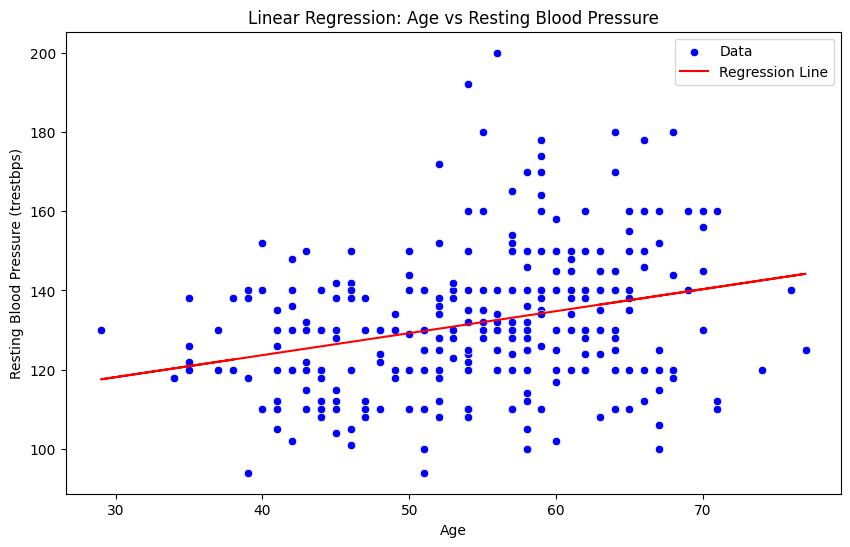

In [38]:
# Create a scatter plot of age vs resting blood pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trestbps', data=df_clean, color='blue', label="Data")

# Plot the regression line
predicted_y = results.predict(X)
plt.plot(df_clean['age'], predicted_y, color='red', label="Regression Line")

# Add titles and labels
plt.title('Linear Regression: Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.legend()

# Show plot
plt.show()
